<a href="https://colab.research.google.com/github/Samuelsilvestre/Salary/blob/master/DataAnalyticsSalary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📊 Análise Exploratória de Dados sobre Salário e Anos de Experiência

**Fonte dos dados:** [Salary Data - Kaggle](https://www.kaggle.com/datasets/mohithsairamreddy/salary-data)


- Pacotes python

In [32]:
import pandas as pd
import matplotlib.pyplot as plt


- Baixando os dados

- Criando o datafram

In [33]:

URL = "https://raw.githubusercontent.com/Samuelsilvestre/Salary/master/data/Salary_Data.csv"

df = pd.read_csv(URL)

df.head()


,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


- Estrutura dos dados

In [34]:
display(df.shape)
display(df.dtypes)
display(df.isnull().sum())

(30, 2)

,0
YearsExperience,float64
Salary,float64


,0
YearsExperience,0
Salary,0


### Tratamento dos dados ###

- Renomeando as colunas

In [35]:
df.columns = ['Anos de experiencia', 'Salario']

- Trocando os tipos de dados

In [36]:
df['Anos de experiencia'] = df['Anos de experiencia'].astype('int64')

In [37]:
df['Salario'] = df['Salario'].astype(float).astype(int)


- Adicionando a faixa de experiencia

In [38]:
bins = [0, 3, 7, float('inf')]
labels = ['Júnior', 'Pleno', 'Sênior']

df['Faixa_Experiencia'] = pd.cut(
    df['Anos de experiencia'],
    bins=bins,
    labels=labels,
    include_lowest=True
)

- Adicionando a faixa salarial

In [40]:
bins_salario = [0, 30000, 50000, float('inf')]

labels_salario = ['Salário Baixo', 'Salário Médio', 'Salário Alto']

df['Faixa_Salarial'] = pd.cut(
    df['Salario'],
    bins=bins_salario,
    labels=labels_salario,
    include_lowest=True
)



- Nova estrutura

In [41]:
display(df.head(10))

,Anos de experiencia,Salario,Faixa_Experiencia,Faixa_Salarial
0,1,39343,Júnior,Salário Médio
1,1,46205,Júnior,Salário Médio
2,1,37731,Júnior,Salário Médio
3,2,43525,Júnior,Salário Médio
4,2,39891,Júnior,Salário Médio
5,2,56642,Júnior,Salário Alto
6,3,60150,Júnior,Salário Alto
7,3,54445,Júnior,Salário Alto
8,3,64445,Júnior,Salário Alto
9,3,57189,Júnior,Salário Alto


Distribuição do salario

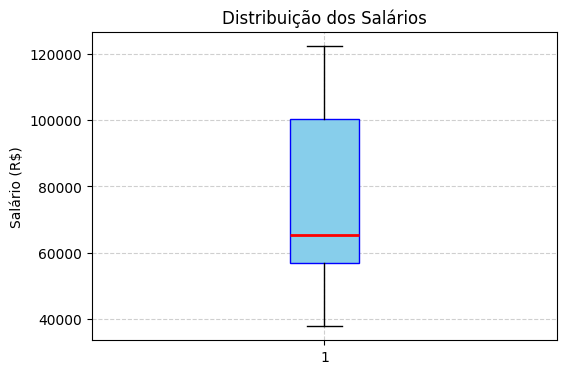

In [92]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.boxplot(
    df['Salario'],
    patch_artist=True,          # permite preencher a caixa com cor
    boxprops=dict(facecolor='skyblue', color='blue'),
    medianprops=dict(color='red', linewidth=2)
)

plt.title('Distribuição dos Salários')
plt.ylabel('Salário (R$)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


### Visualizando o salario ao longo dos anos de experiencia ###

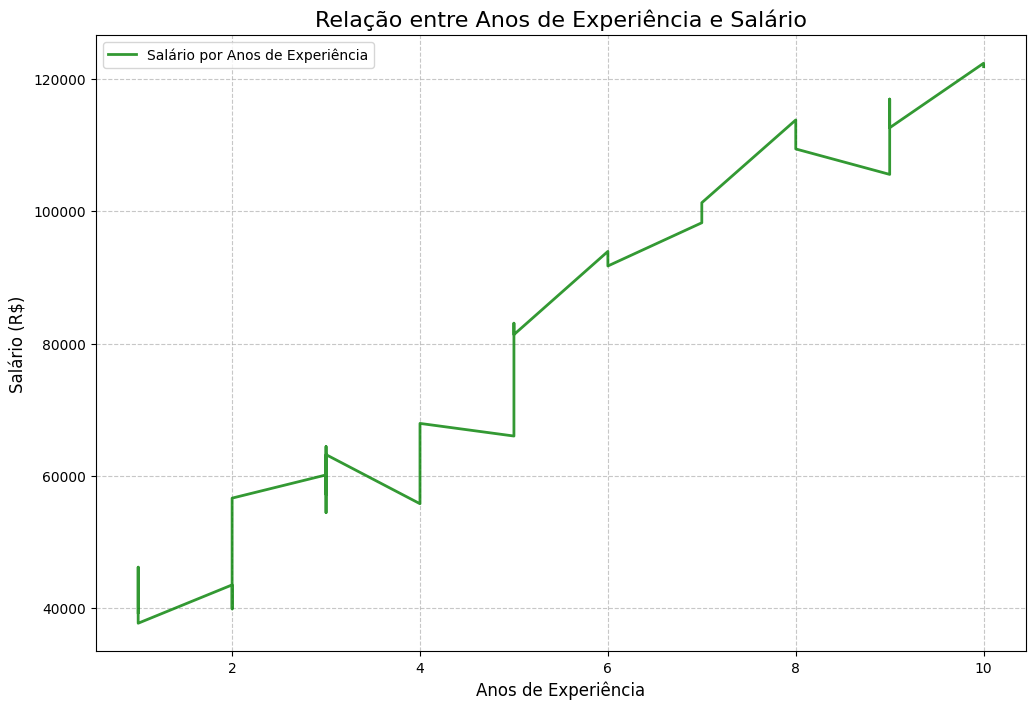

In [49]:

plt.figure(figsize=(12, 8))
plt.plot(df['Anos de experiencia'], df['Salario'],
         label='Salário por Anos de Experiência',
         color='green',
         linestyle='-',
         marker='o',
         markersize=0,
         linewidth=2,
         alpha=0.8)

plt.title('Relação entre Anos de Experiência e Salário', fontsize=16)
plt.xlabel('Anos de Experiência', fontsize=12)
plt.ylabel('Salário (R$)', fontsize=12)

plt.grid(True, linestyle='--', alpha=0.7)

plt.legend()

plt.show()

- Salario por faixa de experiencia

/tmp/ipython-input-4245235133.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_salary = df.groupby('Faixa_Experiencia')['Salario'].mean()


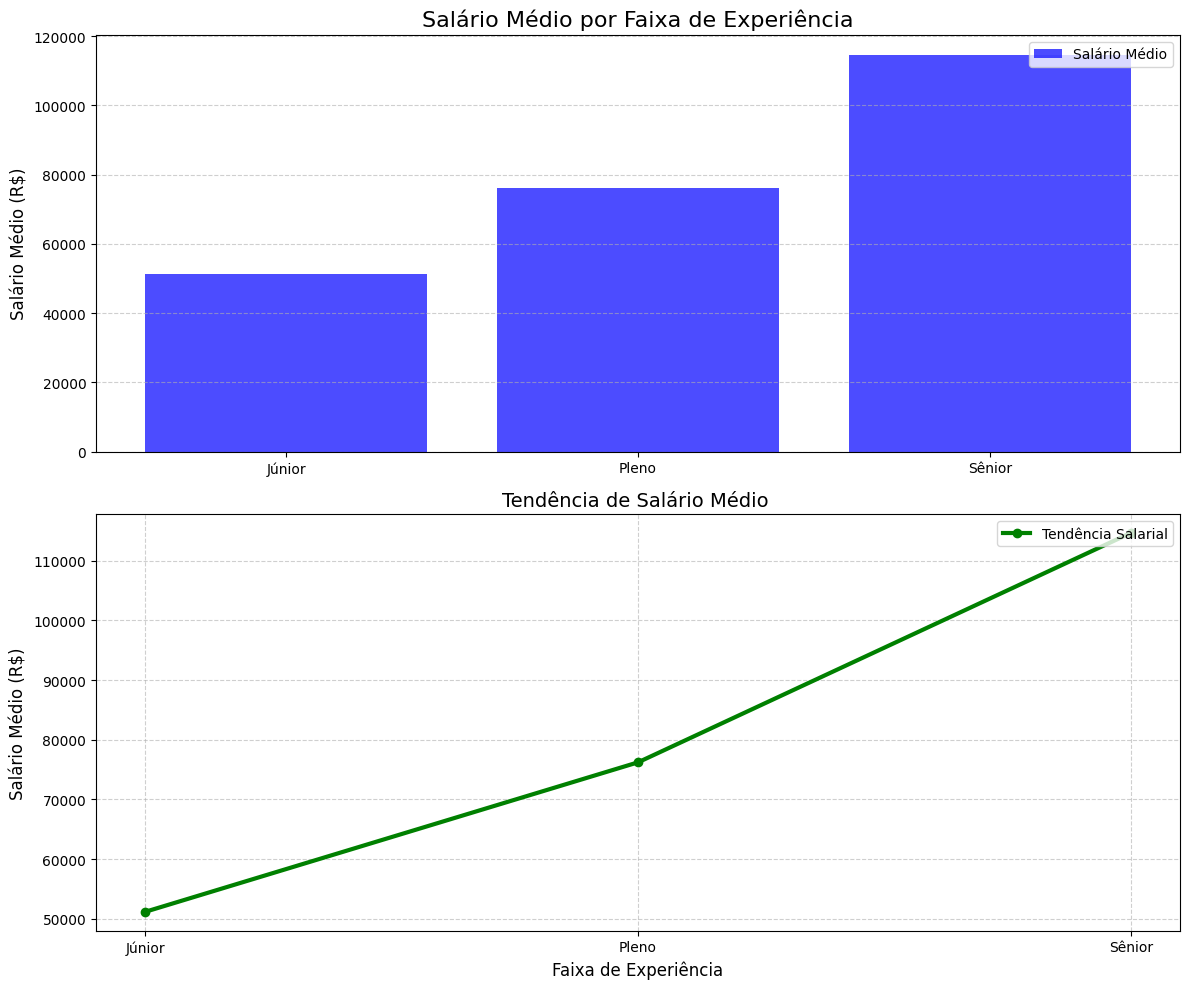

In [63]:


mean_salary = df.groupby('Faixa_Experiencia')['Salario'].mean()

fig, axes = plt.subplots(2, 1, figsize=(12, 10))

axes[0].bar(mean_salary.index, mean_salary.values,
            color='blue',
            alpha=0.7,
            label='Salário Médio')

axes[0].set_title('Salário Médio por Faixa de Experiência', fontsize=16)
axes[0].set_ylabel('Salário Médio (R$)', fontsize=12)
axes[0].grid(axis='y', linestyle='--', alpha=0.6)
axes[0].legend(loc='upper right')

axes[1].plot(mean_salary.index, mean_salary.values,
             color='green',
             linestyle='-',
             marker='o',
             linewidth=3,
             label='Tendência Salarial')

axes[1].set_xlabel('Faixa de Experiência', fontsize=12)
axes[1].set_ylabel('Salário Médio (R$)', fontsize=12)
axes[1].set_title('Tendência de Salário Médio ', fontsize=14)
axes[1].grid(True, linestyle='--', alpha=0.6)
axes[1].legend(loc='upper right')

plt.tight_layout()

plt.show()

- Faixa de salario

/tmp/ipython-input-195719087.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_salary = df.groupby('Faixa_Experiencia')['Salario'].mean()
/tmp/ipython-input-195719087.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  salary = df.groupby('Faixa_Salarial')['Salario'].mean()


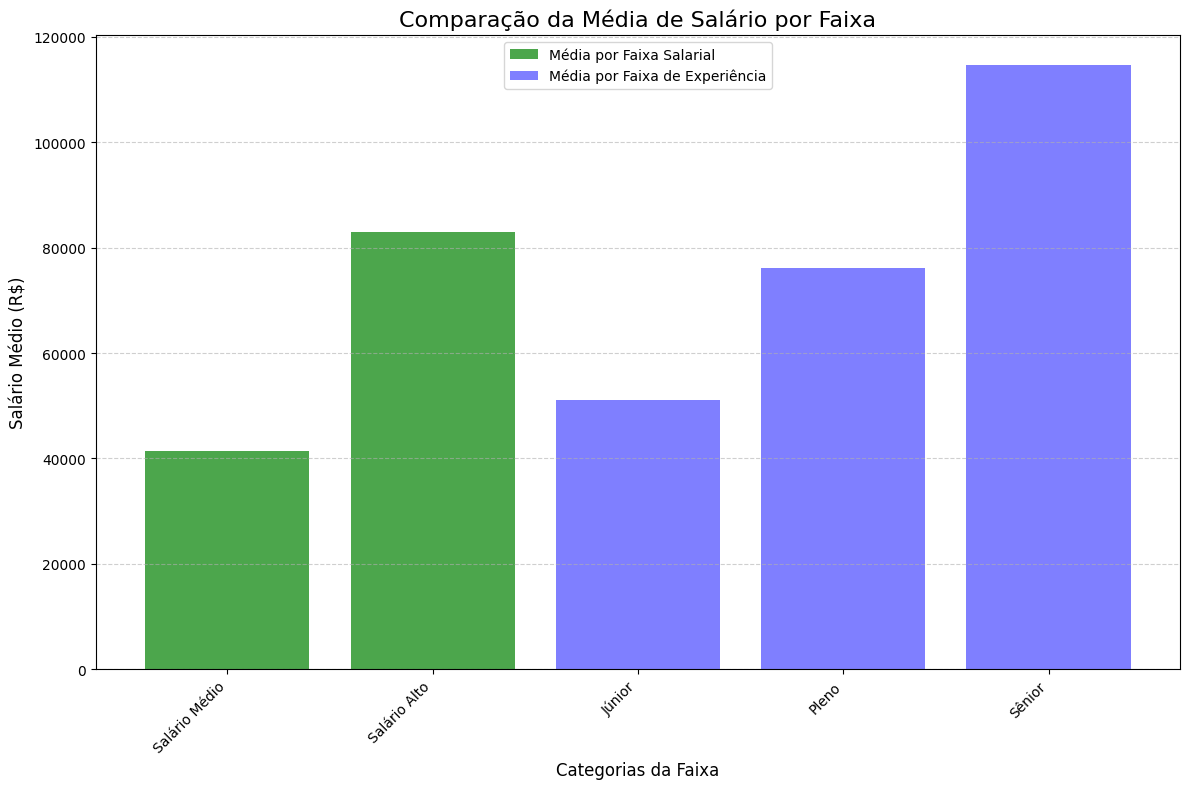

In [82]:


mean_salary = df.groupby('Faixa_Experiencia')['Salario'].mean()
salary = df.groupby('Faixa_Salarial')['Salario'].mean()

plt.figure(figsize=(12, 8))

plt.bar(salary.index, salary.values,
        label='Média por Faixa Salarial',
        color='green',
        alpha=0.7)

plt.bar(mean_salary.index, mean_salary.values,
        label='Média por Faixa de Experiência',
        color='blue',
        alpha=0.5)

plt.title('Comparação da Média de Salário por Faixa', fontsize=16)
plt.xlabel('Categorias da Faixa', fontsize=12)
plt.ylabel('Salário Médio (R$)', fontsize=12)

plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()

plt.show()

## 🧩 Conclusão Final

A análise dos gráficos demonstra que não há representantes na categoria de “Salário Baixo”, indicando uma possível ausência de profissionais nessa faixa ou uma base de dados concentrada em cargos de maior remuneração.

Observa-se também que a evolução salarial ocorre a partir dos 3 anos de experiência, o que evidencia um salto significativo na remuneração após o período inicial da carreira. Tanto os profissionais Júnior quanto Pleno apresentam médias salariais bastante próximas, sugerindo que o avanço entre essas duas categorias não resulta em um aumento expressivo de salário.

No entanto, a categoria Sênior mostra um crescimento salarial acentuado, indicando que a valorização profissional e o retorno financeiro se consolidam apenas após um tempo considerável de e
